# Examen

## Classification d'images avec Keras : "Are you close to Santa ?" 

 

L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables. N'hésitez pas à contacter l'équipe DataScientest si vous rencontrez des problèmes sur help@datascientest.com.

L'objet de cet exercice consiste à créer un modèle de reconnaissance d'image capable de prédire s'il y a un père noël sur l'image. Le modèle devra être le plus précis en ≠ en suivant une méthode qui minimise la taille des données pour un maximum de précision.

Générateur d'images

Avant d'utiliser les images d'une base de données, il faut souvent traiter en amont les images. En deep learning, le réseau de neurones doit s'entraîner sur des lots d'images de la base de données. La classe ImageDataGenerator permet de générer des lots d'images transformées pour entraîner votre réseau. Dans ce test vous devrez vous appuyer sur la documentation cliquez ici.

Importer ImageDataGenerator du sous-module tensorflow.keras.preprocessing.image.
Créer train_datagen une instance de ImageDataGenerator avec pour paramètres :   
- rescale = 1./255,
- shear_range = 0.2,
- zoom_range = 0.2,
- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'   

- Créer test_datagen, une instace de ImageDataGenerator avec comme unique paramètre rescale = 1./255.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
""" ->Found 665 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
"""

## Base de données et importation des données

Deux dossiers s'intitulant images et images_test contiennent chacun deux sous-dossiers d'images. santa qui ne contient que des images de père Noël, et not_santa et l'autre d'images aléatoire d'objets et de personnes qui ne sont pas des pères Noël.

Pour importer et transformer les images avec la classe ImageDataGenerator, on utilise la méthode flow_from_directory qui prend en argument le chemin donnant accès aux dossiers. Elle détecte automatiquement les images et les classes dans deux catégories différentes car les images sont dans deux dossiers différents.

Pour plus d'information sur flow_from_directory cliquez-ici

Pour importer vos images lancer le code suivant.

In [ ]:
# On prend des lots de 32

training_set = train_datagen.flow_from_directory('images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('images_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
""" -> Found 665 images belonging to 2 classes.
Found 78 images belonging to 2 classes.  """

## Affichage de la donnée "Augmentée"

Observons le resultat d'une augmentation de données

Exécuter la cellule suivante pour observer des données augmentées

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

# ici les images sont redimensionnées en (512x512) avec target_size
batches_real = test_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)  # = (9 images, 512, 512, 3 classes)  chez moi ! ok image de départ 64x64 => 512x512 ici
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]
    
    title_add_on = "random image"
    if y_batch_augmented[i][1]: title_add_on =  "santa"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)

    plt.show()

In [ ]:
""" Found 665 images belonging to 2 classes.
Found 665 images belonging to 2 classes. """

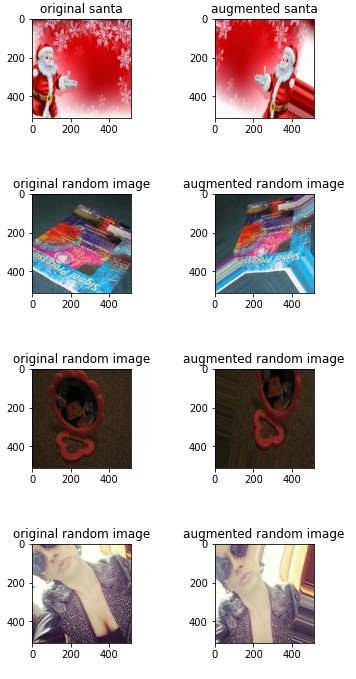

- Quels sont les transformations apportées sur la donnée augmentée ?
- Selon vous, en quoi l'augmentation de données est-elle utile pour l'entrainement d'un réseau de neuronnes ?

In [ ]:
"""

1. il y a des transformations comme :
    * rotation
    * zoom
    * redimensionnement
    * translation horizontale / verticale
    * retournement horizontal
    * etc

    chaquee image a une ou plusieurs transformations, mais pas toutes les transformations en même temps.

2. L'objectif final de tranformation permet d'augementer le jeu de données et d'éviter le sur-apprentisage.

"""

In [ ]:
Pour classer ces images, vous pouvez vous appuyer sur le réseau de neurones suivant :
La sortie de la méthode .summary() de votre modèle devra ressembler à ceci :

                            _________________________________________________________________
                            Layer (type)                 Output Shape              Param #
                            =================================================================
                            conv2d_5 (Conv2D)            (None, 64, 64, 32)        128
                            _________________________________________________________________
                            max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0
                            _________________________________________________________________
                            conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248
                            _________________________________________________________________
                            max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0
                            _________________________________________________________________
                            flatten_3 (Flatten)          (None, 7200)              0
                            _________________________________________________________________
                            dense_5 (Dense)              (None, 128)               921728
                            _________________________________________________________________
                            dense_6 (Dense)              (None, 2)                 258
                            =================================================================
                            Total params: 931,233
                            Trainable params: 931,233
                            Non-trainable params: 0
                            _________________________________________________________________

Implémenter votre modèle dans une instance nommée classifier.
Entrainer votre modèle jusqu'à atteindre une précision de validation val_accuracy supérieure à 0.85, en choisissant judicieusement les paramètres d'entrainement.
NB : Avec la dernière version de tensorflow, la méthode fit gère maintenant les générateurs.  

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras import Sequential


# Insérer votre code ici

# constuire le modèle

classifier= Sequential()

classifier.add(Conv2D(filters= 32, kernel_size= (1,1),padding= 'valid',input_shape= (64,64,3), activation= 'relu'))

classifier.add(MaxPooling2D(pool_size= (2,2)))

classifier.add(Conv2D(filters= 32, kernel_size= (3,3), padding= 'valid',activation= 'relu'))

classifier.add(MaxPooling2D(pool_size= (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units= 128,activation= 'relu'))

classifier.add(Dense(units= 2, activation= 'softmax'))

classifier.summary()

- Entrainer votre modèle jusqu'à atteindre une précision de validation val_accuracy supérieure à 0.85, en choisissant judicieusement les paramètres d'entrainement.

In [ ]:
# parames à essayer

batch_size= 128
epochs= 10
opti= 'adam'
loss= 'categorical_crossentropy'

classifier.compile(optimizer=opti, loss=loss, metrics=['accuracy'])

'''
dict_keys(['loss', 'accuracy'])

utiliser 'accuracy' comme metrics selon la version keras
'''

In [ ]:
history= classifier.fit_generator(generator=training_set,
                                  epochs= epochs,
                                  steps_per_epoch= 665//batch_size,
                                  validation_data= test_set,
                                  validation_steps= 78//batch_size)

In [ ]:
history_dict= history.history
history_dict.keys()
dict_keys(['loss', 'accuracy'])
val_acc=history.history['accuracy']


In [ ]:
print(val_acc)

In [ ]:
dict_keys(['loss', 'accuracy']

## Test du modèle

Exécuter le code suivant pour obsever la probabilité que l'on obtient pour une image de Thor.

In [ ]:
#Test du modèle
# Exécuter le code suivant pour obsever la probabilité que l'on obtient pour une image de Thor.

from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

txt ='thor.jpg' # Préciser le chemin local
test_image = image.load_img(txt, target_size = (64, 64))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)

proba = round(100*classifier.predict(test_image)[0][1], 2)
if proba < 50:
    santa_or_not = 'Not Santa'
    proba = round(100-proba, 2)
else:
    santa_or_not = 'Santa'
img = mpimg.imread(txt)
plt.axis('off')
plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color = (1, 0, 0), fontsize = 20, fontweight = 'extra bold')
imgplot = plt.imshow(img)

Réitérer le test avec les photos suivantes:
- chien.jpg
- chat.jpg
- selfie.jpg
- santa_rock.jpeg

In [ ]:
# Insérer votre code ici

def test(photo):
    txt=photo # Préciser le chemin local
    test_image= image.load_img(txt, target_size= (64, 64))
    test_image= image.img_to_array(test_image)/255
    test_image= np.expand_dims(test_image, axis= 0)
    proba= round(100*classifier.predict(test_image)[0][1], 2)
    if proba<50:
        santa_or_not= 'Not Santa'
        proba= round(100-proba, 2)
    else:
        santa_or_not= 'Santa'
    img= mpimg.imread(txt)
    plt.axis('off')
    plt.text(-10, -15, santa_or_not+': '+str(proba)+'%', color= (1, 0, 0), fontsize= 20, fontweight= 'extra bold')
    imgplot= plt.imshow(img)


photo1= 'chien.jpg'

photo2= 'chat.jpg'

photo3= 'selfie.jpg'

photo4= 'santa_rock.jpeg'

test(photo1)



In [ ]:
test(photo2)

In [ ]:
test(photo3)

In [ ]:
test(photo4)

Pour approfondir sur l'augmentation de données consultez cet article du blog keras.

 

À partir de l’adresse <https://eval.datascientest.com/user/5D32B723/notebooks/exam_python.ipynb#>